In [1]:
import pandas as pd
import numpy as np
import nltk
from nltk.tokenize import regexp_tokenize, word_tokenize, RegexpTokenizer
from nltk.corpus import stopwords, wordnet
from nltk import pos_tag
from nltk.stem import WordNetLemmatizer
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, precision_score, confusion_matrix
from sklearn.metrics import recall_score

In [2]:
dfraw = pd.read_csv("../../data/judge-1377884607_tweet_product_company.csv", encoding = 'latin1')

In [3]:
df = pd.read_csv("../../data/judge-1377884607_tweet_product_company.csv", encoding = 'latin1')


In [4]:
df.head()

,tweet_text,emotion_in_tweet_is_directed_at,is_there_an_emotion_directed_at_a_brand_or_product
0,.@wesley83 I have a 3G iPhone. After 3 hrs twe...,iPhone,Negative emotion
1,@jessedee Know about @fludapp ? Awesome iPad/i...,iPad or iPhone App,Positive emotion
2,@swonderlin Can not wait for #iPad 2 also. The...,iPad,Positive emotion
3,@sxsw I hope this year's festival isn't as cra...,iPad or iPhone App,Negative emotion
4,@sxtxstate great stuff on Fri #SXSW: Marissa M...,Google,Positive emotion


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9093 entries, 0 to 9092
Data columns (total 3 columns):
 #   Column                                              Non-Null Count  Dtype 
---  ------                                              --------------  ----- 
 0   tweet_text                                          9092 non-null   object
 1   emotion_in_tweet_is_directed_at                     3291 non-null   object
 2   is_there_an_emotion_directed_at_a_brand_or_product  9093 non-null   object
dtypes: object(3)
memory usage: 213.2+ KB


------------**Look at Product and limit it to Apple and Google.**----------------

In [6]:
df.emotion_in_tweet_is_directed_at.value_counts()

iPad                               946
Apple                              661
iPad or iPhone App                 470
Google                             430
iPhone                             297
Other Google product or service    293
Android App                         81
Android                             78
Other Apple product or service      35
Name: emotion_in_tweet_is_directed_at, dtype: int64

In [7]:
df.rename(columns = {'emotion_in_tweet_is_directed_at': 'Product', 'is_there_an_emotion_directed_at_a_brand_or_product': 'Emotion', 'tweet_text': 'Text'}, inplace= True)

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9093 entries, 0 to 9092
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   Text     9092 non-null   object
 1   Product  3291 non-null   object
 2   Emotion  9093 non-null   object
dtypes: object(3)
memory usage: 213.2+ KB


-----------**Exploring missing values.**------------------

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9093 entries, 0 to 9092
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   Text     9092 non-null   object
 1   Product  3291 non-null   object
 2   Emotion  9093 non-null   object
dtypes: object(3)
memory usage: 213.2+ KB


**Rows containing the word 'apple' that don't have a product identified. I don't know where to go from here. Can we fill the Product with 'Apple' somehow? Same with google.**

dfb['c'][dfb['a'].str.startswith('o')] = 42 #good


dfb[dfb['a'].str.startswith('o')]['c'] = 42 #bad

In [10]:
# df.Product.loc[(df.Text.str.contains('Apple')) & df.Product.isnull()].value_counts()

In [11]:
# df.Product.loc[(df.Text.str.contains('Apple')) & df.Product.isnull()].replace(to_replace = np.NaN, value = 'test', inplace = True)

In [12]:
# df.Product.isna().sum()

In [13]:
#df.loc[(df.Text.str.contains('Apple')) & df.Product.isnull()]['Product'].replace(to_replace = np.NaN, value = 'test', inplace = True)

In [14]:
df.Product.value_counts()

iPad                               946
Apple                              661
iPad or iPhone App                 470
Google                             430
iPhone                             297
Other Google product or service    293
Android App                         81
Android                             78
Other Apple product or service      35
Name: Product, dtype: int64

In [15]:
# boolean_condition = df.A > 3
# column_name = "A"
# new_value = 500

# df.loc[boolean_condition, column_name] = new_value

In [16]:
# condition = ((df.Text.str.contains('Apple')) & df.Product.isnull())
# column_name = df.Product
# new_value = 'test'
# df.loc[condition, column_name] = new_value

-----------**What are we going to do with our target?**------------

In [17]:
df.dropna(subset=['Text'], inplace = True)

In [18]:
df.isna().sum()

Text          0
Product    5801
Emotion       0
dtype: int64

In [19]:
df['Text'] = df['Text'].str.replace(r'[^\w\s]', '')
df['Text'] = df['Text'].str.lower()

<ipython-input-19-0d75204bcec7>:1: FutureWarning: The default value of regex will change from True to False in a future version.
  df['Text'] = df['Text'].str.replace(r'[^\w\s]', '')


In [20]:
df['Text'] = df['Text'].str.split(' ')
df.fillna('na',inplace=True)

In [21]:
df.Text.head()

0    [wesley83, i, have, a, 3g, iphone, after, 3, h...
1    [jessedee, know, about, fludapp, , awesome, ip...
2    [swonderlin, can, not, wait, for, ipad, 2, als...
3    [sxsw, i, hope, this, years, festival, isnt, a...
4    [sxtxstate, great, stuff, on, fri, sxsw, maris...
Name: Text, dtype: object

In [22]:
df['test'] = ''

In [23]:
# apple = ['iphone','ipad','apple','apples','ipads']
# android = ['android','google','androids','googles']
# for ind , val in enumerate(df['tweet_text']):
#     if df['emotion_in_tweet_is_directed_at'].values[ind] == 'na':
#         for y in val:
#             if y in apple:
#                 df['test'].values[ind] = y
#             elif y in android:
#                 df['test'].values[ind] = y
                
#     else:
#         df['test'].values[ind] = df['emotion_in_tweet_is_directed_at'].values[ind]

In [24]:
apple = ['iphone','ipad','apple','apples','ipads']
android = ['android','google','androids','googles']
for ind , val in enumerate(df['Text']):
    if df['Product'].values[ind] == 'na':
        for y in val:
            if y in apple:
                df['test'].values[ind] = y
            elif y in android:
                df['test'].values[ind] = y
                
    else:
        df['test'].values[ind] = df['Product'].values[ind]

In [25]:
df['test'] = df['test'].map(lambda x : x.lower())
df['test'].unique()

array(['iphone', 'ipad or iphone app', 'ipad', 'google', 'android',
       'apple', 'android app', 'other google product or service', '',
       'googles', 'ipads', 'apples', 'other apple product or service',
       'androids'], dtype=object)

In [26]:
df['test'] = df['test'].replace({'googles': 'google', 'apples': 'apple', 'androids': 'android','ipads':'ipad'})

In [27]:
def company_search(test):
    if test == 'iphone':
        return 'apple'
    elif test == 'apple':
        return 'apple'
    elif test == 'ipad':
        return 'apple'
    elif test == 'ipad or iphone app':
        return 'apple'
    elif test == 'itunes':
        return 'apple'
    elif test == 'other apple product or service':
        return 'apple'
    elif test == 'ios':
        return 'apple'
    elif test == 'ipadquot':
        return 'apple'
    elif test == 'applequot':
        return 'apple'
    elif test == 'iphonequot':
        return 'apple'
    elif test == 'quotiphone':
        return 'apple'
    elif test == 'iosquot':
        return 'apple'
    elif test =='quotipad':
        return 'apple'
    elif test == 'quotapple':
        return 'apple'
    elif test =='google':
        return 'google'
    elif test == 'android':
        return 'google'
    elif test == 'other google product or service':
        return 'google'
    elif test == 'android app':
        return 'google'
    elif test == 'quotgoogle':
        return 'google'
    elif test == 'googlequot':
        return 'google'
    elif test == 'androidquot':
        return 'google'
    else:
        return 'unknown'
df['company'] = df['test'].map(company_search)

In [28]:
df.Product.value_counts()

na                                 5801
iPad                                946
Apple                               661
iPad or iPhone App                  470
Google                              430
iPhone                              297
Other Google product or service     293
Android App                          81
Android                              78
Other Apple product or service       35
Name: Product, dtype: int64

In [29]:
df.loc[df.Product == 'na'].count()

Text       5801
Product    5801
Emotion    5801
test       5801
company    5801
dtype: int64

In [30]:
df.loc[df.test == ''].count()

Text       978
Product    978
Emotion    978
test       978
company    978
dtype: int64

In [31]:
df.Product.value_counts()

na                                 5801
iPad                                946
Apple                               661
iPad or iPhone App                  470
Google                              430
iPhone                              297
Other Google product or service     293
Android App                          81
Android                              78
Other Apple product or service       35
Name: Product, dtype: int64

In [32]:
df.Emotion.value_counts()

No emotion toward brand or product    5388
Positive emotion                      2978
Negative emotion                       570
I can't tell                           156
Name: Emotion, dtype: int64

In [33]:
emotion_dict = {'No emotion toward brand or product' : 'Neutral emotion', "I can't tell": 'Neutral emotion', 'Positive emotion': 'Positive emotion',
               'Negative emotion': 'Negative emotion'}
df['Emotion'] = df['Emotion'].map(emotion_dict)


<AxesSubplot:>

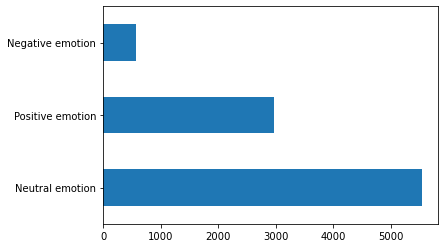

In [34]:
df.Emotion.value_counts().plot.barh()

In [35]:
df.isna().sum()

Text       0
Product    0
Emotion    0
test       0
company    0
dtype: int64

In [36]:
df.head()

,Text,Product,Emotion,test,company
0,"[wesley83, i, have, a, 3g, iphone, after, 3, h...",iPhone,Negative emotion,iphone,apple
1,"[jessedee, know, about, fludapp, , awesome, ip...",iPad or iPhone App,Positive emotion,ipad or iphone app,apple
2,"[swonderlin, can, not, wait, for, ipad, 2, als...",iPad,Positive emotion,ipad,apple
3,"[sxsw, i, hope, this, years, festival, isnt, a...",iPad or iPhone App,Negative emotion,ipad or iphone app,apple
4,"[sxtxstate, great, stuff, on, fri, sxsw, maris...",Google,Positive emotion,google,google


In [37]:
df.Emotion.value_counts()

Neutral emotion     5544
Positive emotion    2978
Negative emotion     570
Name: Emotion, dtype: int64

In [38]:
df.test.value_counts()

ipad                               2108
google                             2050
apple                              1643
iphone                             1054
                                    978
ipad or iphone app                  470
android                             380
other google product or service     293
android app                          81
other apple product or service       35
Name: test, dtype: int64

In [39]:
df.company.value_counts()

apple      5310
google     2804
unknown     978
Name: company, dtype: int64

<AxesSubplot:xlabel='company'>

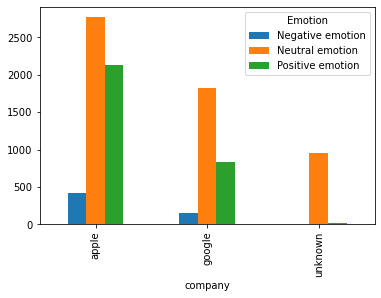

In [40]:
pd.crosstab(df.company, df.Emotion).plot.bar()

<AxesSubplot:xlabel='Emotion'>

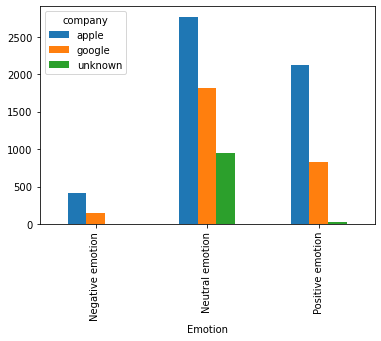

In [41]:
pd.crosstab(df.Emotion, df.company).plot.bar()

In [42]:
# df = df[df.test != 'na']

In [43]:
target_dict = {'Negative emotion': 0, 'Neutral emotion': 1, 'Positive emotion': 2}
df['target'] = df['Emotion'].map(target_dict)

In [44]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9092 entries, 0 to 9092
Data columns (total 6 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   Text     9092 non-null   object
 1   Product  9092 non-null   object
 2   Emotion  9092 non-null   object
 3   test     9092 non-null   object
 4   company  9092 non-null   object
 5   target   9092 non-null   int64 
dtypes: int64(1), object(5)
memory usage: 497.2+ KB


In [45]:
df = df.drop(['Product', 'Emotion'], axis = 1)

In [46]:
df['product'] = df['test']

In [47]:
df = df.drop(['test'], axis = 1)

In [48]:
df.head()

,Text,company,target,product
0,"[wesley83, i, have, a, 3g, iphone, after, 3, h...",apple,0,iphone
1,"[jessedee, know, about, fludapp, , awesome, ip...",apple,2,ipad or iphone app
2,"[swonderlin, can, not, wait, for, ipad, 2, als...",apple,2,ipad
3,"[sxsw, i, hope, this, years, festival, isnt, a...",apple,0,ipad or iphone app
4,"[sxtxstate, great, stuff, on, fri, sxsw, maris...",google,2,google


In [49]:
df.company.value_counts()

apple      5310
google     2804
unknown     978
Name: company, dtype: int64

In [50]:
df.company.isna().sum()

0

In [51]:
df.target.value_counts(normalize=True)

1    0.609767
2    0.327541
0    0.062692
Name: target, dtype: float64

In [52]:
df.target.isna().sum()

0

In [53]:
df['product'].value_counts()

ipad                               2108
google                             2050
apple                              1643
iphone                             1054
                                    978
ipad or iphone app                  470
android                             380
other google product or service     293
android app                          81
other apple product or service       35
Name: product, dtype: int64

In [54]:
df['product'].isna().sum()

0

In [55]:
df = df[df['product'] != '']

In [56]:
df['product'].value_counts()

ipad                               2108
google                             2050
apple                              1643
iphone                             1054
ipad or iphone app                  470
android                             380
other google product or service     293
android app                          81
other apple product or service       35
Name: product, dtype: int64

In [57]:
X = df['Text'].str.join(' ')
y = df.target

In [58]:
X

0       wesley83 i have a 3g iphone after 3 hrs tweeti...
1       jessedee know about fludapp  awesome ipadiphon...
2       swonderlin can not wait for ipad 2 also they s...
3       sxsw i hope this years festival isnt as crashy...
4       sxtxstate great stuff on fri sxsw marissa maye...
                              ...                        
9088                            ipad everywhere sxsw link
9089    wave buzz rt mention we interrupt your regular...
9090    googles zeiger a physician never reported pote...
9091    some verizon iphone customers complained their...
9092    ïïàü_êîòáââ_â_ûârt mention google tests ûïchec...
Name: Text, Length: 8114, dtype: object

In [59]:
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify = y)

In [60]:
from sklearn.feature_extraction.text import TfidfVectorizer
from nltk.corpus import stopwords

In [61]:
sw = stopwords.words('english')

In [62]:
from sklearn.pipeline import make_pipeline
from sklearn.naive_bayes import MultinomialNB
from sklearn.model_selection import cross_validate
from sklearn.metrics import make_scorer, fbeta_score

micro_recall = make_scorer(recall_score, average='micro')
pipe = make_pipeline(TfidfVectorizer(stop_words= sw), MultinomialNB())
cv = cross_validate(pipe, X_train, y_train, scoring = micro_recall)
cv

{'fit_time': array([0.11673713, 0.083776  , 0.08377695, 0.0867672 , 0.1107049 ]),
 'score_time': array([0.01989794, 0.01894999, 0.02094412, 0.03191471, 0.01994753]),
 'test_score': array([0.64585045, 0.63927691, 0.62448644, 0.63434675, 0.6409203 ])}